In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hotel_booking.csv')

In [3]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [4]:
df.drop(['name','email','phone-number','credit_card'],axis = 1, inplace= True)

In [5]:
df.isnull().sum().sort_values(ascending = True)

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

In [6]:
df['agent'].fillna('0', inplace=True)

In [7]:
df['company'].fillna('0', inplace=True)

In [8]:
df['children'].fillna('0', inplace=True)

In [9]:
df.dropna(axis=0, inplace = True, subset=['country'])

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [12]:
df['children'] = df['children'].astype(int)

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [13]:
df['reservation date'] = pd.DatetimeIndex(df['reservation_status_date']).day
df['reservation month'] = pd.DatetimeIndex(df['reservation_status_date']).month
df['reservation year'] = pd.DatetimeIndex(df['reservation_status_date']).year

In [14]:
month_number={'January':1,
             'February':2,
             'March':3,
             'April':4,
             'May':5,
             'June':6,
             'July':7,
             'August':8,
             'September':9,
             'October':10,
             'November':11,
             'December':12}

df['arrival_date_month_number']=df['arrival_date_month'].apply(lambda x:month_number[x])
df['arrival_date_month_number']=df['arrival_date_month_number'].astype('category')



In [15]:
df['date_of_arrival']=pd.to_datetime(df['arrival_date_year'].astype(str) \
                                     +df['arrival_date_month_number'].astype(str) \
                                     +df['arrival_date_day_of_month'].astype(str),format="%Y%m%d")

In [16]:
# Number of one day stays
df[(df['stays_in_week_nights']==0) & (df['stays_in_weekend_nights']==0)]['hotel'].count()

701

In [17]:

df['total_night_stays']=df['stays_in_week_nights'].astype(int)+df['stays_in_weekend_nights'].astype(int)
df['total_night_stays'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 15, 10, 11, 14,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       35, 45, 38, 24, 48, 49, 57, 34, 43])

In [18]:
df['One_day_stay']=(df['reservation_status']=='Check-Out')&(df['total_night_stays']==0)

In [19]:
df['One_day_stay'].unique()

array([ True, False])

In [20]:
df.corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.291940
arrival_date_year                 0.016339
arrival_date_week_number          0.007481
arrival_date_day_of_month        -0.006173
stays_in_weekend_nights          -0.002639
stays_in_week_nights              0.024103
adults                            0.058408
children                          0.004740
babies                           -0.032523
is_repeated_guest                -0.085185
previous_cancellations            0.109914
previous_bookings_not_canceled   -0.055495
booking_changes                  -0.144669
days_in_waiting_list              0.054008
adr                               0.046133
required_car_parking_spaces      -0.194801
total_of_special_requests        -0.235595
reservation date                 -0.034116
reservation month                -0.069340
reservation year                 -0.117585
total_night_stays                 0.016963
One_day_stay                     -0.058077
Name: is_ca

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   arrival_date_year               118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   arrival_date_day_of_month       118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  int64  

In [22]:
df["One_day_stay"] = df["One_day_stay"].apply(lambda x: 0 if x =='True' else 1)

In [23]:
df['date_of_arrival']=df['date_of_arrival'].astype(int)

In [24]:
df[df.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,reservation date,reservation month,reservation year,arrival_date_month_number,date_of_arrival,total_night_stays,One_day_stay
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,0,Check-Out,2017-03-15,15,3,2017,3,1488672000000000000,10,1


In [25]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
df = df.drop(df[df.adr < 0].index)

In [26]:
df[df['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,reservation date,reservation month,reservation year,arrival_date_month_number,date_of_arrival,total_night_stays,One_day_stay
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,0,Canceled,2016-02-19,19,2,2016,3,1458864000000000000,1,1


In [27]:
df = df.drop(df[df.adr > 5000].index)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118900 non-null  object        
 1   is_canceled                     118900 non-null  int64         
 2   lead_time                       118900 non-null  int64         
 3   arrival_date_year               118900 non-null  int64         
 4   arrival_date_month              118900 non-null  object        
 5   arrival_date_week_number        118900 non-null  int64         
 6   arrival_date_day_of_month       118900 non-null  int64         
 7   stays_in_weekend_nights         118900 non-null  int64         
 8   stays_in_week_nights            118900 non-null  int64         
 9   adults                          118900 non-null  int64         
 10  children                        118900 non-null  int64  

In [29]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,reservation date,reservation month,reservation year,arrival_date_month_number,date_of_arrival,total_night_stays,One_day_stay,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,1,7,2015,7,1435708800000000000,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,1,7,2015,7,1435708800000000000,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,2,7,2015,7,1435708800000000000,1,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,2,7,2015,7,1435708800000000000,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,3,7,2015,7,1435708800000000000,2,1,0


In [30]:
df.drop(['children','babies'],axis = 1, inplace = True)

In [31]:
df['guests'] = df['adults'] + df['kids']
df.head()

# total guest of the hotel booking by adding the babies children and babies


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,reservation date,reservation month,reservation year,arrival_date_month_number,date_of_arrival,total_night_stays,One_day_stay,kids,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,2015-07-01,1,7,2015,7,1435708800000000000,0,1,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,2015-07-01,1,7,2015,7,1435708800000000000,0,1,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,2015-07-02,2,7,2015,7,1435708800000000000,1,1,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2015-07-02,2,7,2015,7,1435708800000000000,1,1,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2015-07-03,3,7,2015,7,1435708800000000000,2,1,0,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118900 non-null  object        
 1   is_canceled                     118900 non-null  int64         
 2   lead_time                       118900 non-null  int64         
 3   arrival_date_year               118900 non-null  int64         
 4   arrival_date_month              118900 non-null  object        
 5   arrival_date_week_number        118900 non-null  int64         
 6   arrival_date_day_of_month       118900 non-null  int64         
 7   stays_in_weekend_nights         118900 non-null  int64         
 8   stays_in_week_nights            118900 non-null  int64         
 9   adults                          118900 non-null  int64         
 10  meal                            118900 non-null  object 

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118900.0,3.713709e-01,4.831734e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
lead_time,118900.0,1.043078e+02,1.069035e+02,0.000000e+00,1.800000e+01,6.900000e+01,1.610000e+02,7.370000e+02
arrival_date_year,118900.0,2.016158e+03,7.074805e-01,2.015000e+03,2.016000e+03,2.016000e+03,2.017000e+03,2.017000e+03
arrival_date_week_number,118900.0,2.716699e+01,1.358974e+01,1.000000e+00,1.600000e+01,2.800000e+01,3.800000e+01,5.300000e+01
arrival_date_day_of_month,118900.0,1.580058e+01,8.780348e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
stays_in_weekend_nights,118900.0,9.288730e-01,9.961763e-01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
stays_in_week_nights,118900.0,2.502119e+00,1.900148e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.100000e+01
adults,118900.0,1.858402e+00,5.785803e-01,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,5.500000e+01
is_repeated_guest,118900.0,3.200168e-02,1.760052e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
previous_cancellations,118900.0,8.714045e-02,8.458619e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01


In [34]:
df.describe(include = 'object').T
# for categorical variables

,count,unique,top,freq
hotel,118900,2,City Hotel,79305
arrival_date_month,118900,12,August,13856
meal,118900,5,BB,91865
country,118900,177,PRT,48589
market_segment,118900,8,Online TA,56403
distribution_channel,118900,5,TA/TO,97729
reserved_room_type,118900,10,A,85599
assigned_room_type,118900,12,A,73862
deposit_type,118900,3,No Deposit,104166
agent,118900.0,333.0,9.0,31960.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118900 non-null  object        
 1   is_canceled                     118900 non-null  int64         
 2   lead_time                       118900 non-null  int64         
 3   arrival_date_year               118900 non-null  int64         
 4   arrival_date_month              118900 non-null  object        
 5   arrival_date_week_number        118900 non-null  int64         
 6   arrival_date_day_of_month       118900 non-null  int64         
 7   stays_in_weekend_nights         118900 non-null  int64         
 8   stays_in_week_nights            118900 non-null  int64         
 9   adults                          118900 non-null  int64         
 10  meal                            118900 non-null  object 

In [36]:
# UNIVARIANT ANALYSIS

In [37]:
# Hotel type
h = df['hotel'].value_counts()
h

City Hotel      79305
Resort Hotel    39595
Name: hotel, dtype: int64

<AxesSubplot:ylabel='hotel'>

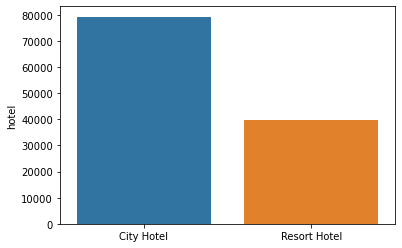

In [38]:
sns.barplot(x=h.index, y=h)

In [39]:
# cancellation
i = df['is_canceled'].value_counts()
i

0    74744
1    44156
Name: is_canceled, dtype: int64

<AxesSubplot:ylabel='is_canceled'>

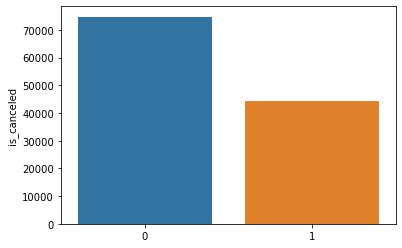

In [40]:
sns.barplot(x=i.index, y=i)

In [41]:
# lead time
df['lead_time'].value_counts()

0      6223
1      3395
2      2034
3      1802
4      1696
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

In [42]:
# many leadtimes so we group them into months
lt_months = df['lead_time'] // 30
lt_months.value_counts() / len(df)

0     0.316728
1     0.144449
2     0.106854
3     0.088015
4     0.067872
5     0.066451
6     0.048007
7     0.036728
9     0.028991
8     0.028789
10    0.023103
11    0.015055
12    0.008225
13    0.006863
15    0.004760
14    0.004474
20    0.001220
16    0.001034
17    0.001026
18    0.000765
19    0.000572
24    0.000008
23    0.000008
Name: lead_time, dtype: float64

In [43]:
df['lead_time_month'] = df['lead_time'] // 30

In [44]:
lt = df['lead_time_month'].value_counts()
lt

0     37659
1     17175
2     12705
3     10465
4      8070
5      7901
6      5708
7      4367
9      3447
8      3423
10     2747
11     1790
12      978
13      816
15      566
14      532
20      145
16      123
17      122
18       91
19       68
24        1
23        1
Name: lead_time_month, dtype: int64

<AxesSubplot:ylabel='lead_time_month'>

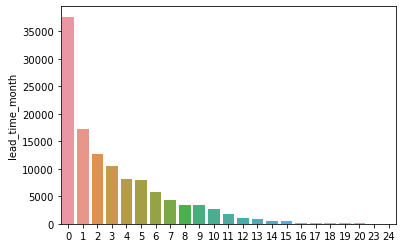

In [45]:
sns.barplot(x=lt.index, y=lt)

In [46]:
# DISTRIBUTION CHANNEL

In [47]:
dc = df['distribution_channel'].value_counts()
dc
# travel agencies is the biggest booking distribution channel
# second highest is direct

TA/TO        97729
Direct       14482
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

<AxesSubplot:ylabel='distribution_channel'>

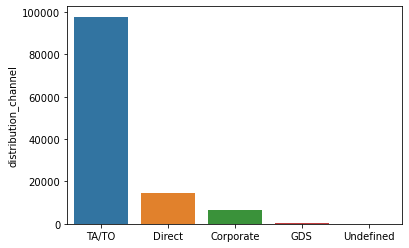

In [48]:
sns.barplot(x=dc.index, y=dc)

In [49]:
# MARKET SEGMENT

ms = df['market_segment'].value_counts()
ms
# same as distribution channels

Online TA        56403
Offline TA/TO    24159
Groups           19805
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<AxesSubplot:ylabel='market_segment'>

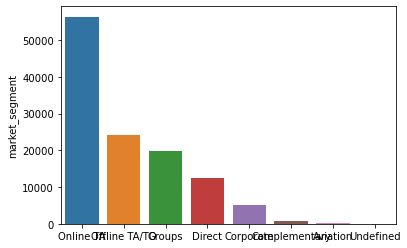

In [50]:
sns.barplot(x=ms.index, y=ms)

In [51]:
# MEAL COLUMN
df['meal'] = df['meal'].replace(to_replace='Undefined', value='SC')

m = df['meal'].value_counts()
m

# Undefined values in meal package 
# by description undefined meal package is same as sc
# so replacing undefined with SC

BB    91865
HB    14434
SC    11803
FB      798
Name: meal, dtype: int64

<AxesSubplot:ylabel='meal'>

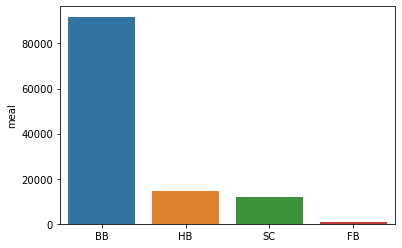

In [52]:
sns.barplot(x=m.index, y=m)

In [53]:
# country

c = df['country'].value_counts().head(10)
c
# half of booking were done by portuguese
# many unique values from all the countries 
# spliting the booking into international booking or local booking 

PRT    48589
GBR    12128
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

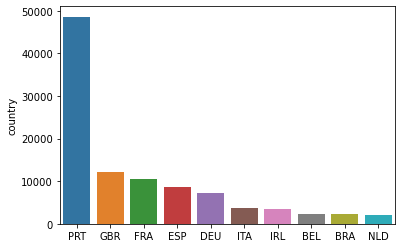

In [54]:
sns.barplot(x=c.index, y=c)

In [55]:
def country(row):
    if (row['country'] == 'PRT'):
        return 0
    else :
        return 1
    
df['booking_location'] = df.apply(country, axis = 1)

In [56]:
bl = df['booking_location'].value_counts()
bl

1    70311
0    48589
Name: booking_location, dtype: int64

<AxesSubplot:ylabel='booking_location'>

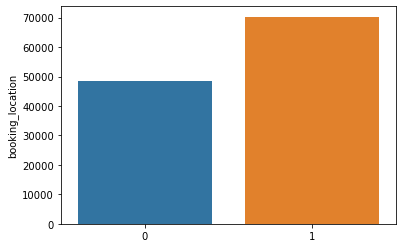

In [57]:
sns.barplot(x=bl.index, y=bl)

In [58]:
# RESERVED ROOM TYPE

rt = df['reserved_room_type'].value_counts()
rt
# A type is most popular compared to other types

A    85599
D    19173
E     6497
F     2890
G     2083
B     1118
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

<AxesSubplot:ylabel='reserved_room_type'>

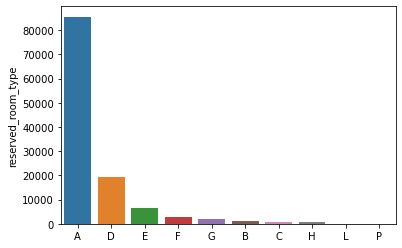

In [59]:
sns.barplot(x=rt.index, y=rt)

In [60]:
# DEPOSIT TYPE

dt = df['deposit_type'].value_counts()
dt
#  no deposit type is more popular 
# the flexibility that's given to the customer to book hotel without any deposit

No Deposit    104166
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot:ylabel='deposit_type'>

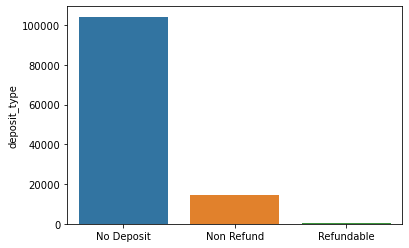

In [61]:
sns.barplot(x=dt.index, y=dt)

In [62]:
# REPEATED GUEST

rg = df['is_repeated_guest'].value_counts()
rg
# approx 3 percent of the repeated guest 
# repeated guest may effect the cancellation

0    115095
1      3805
Name: is_repeated_guest, dtype: int64

<AxesSubplot:ylabel='is_repeated_guest'>

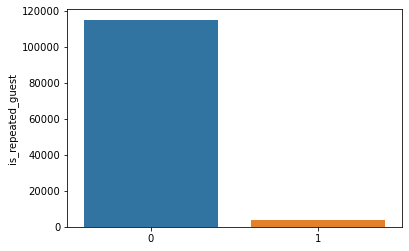

In [63]:
sns.barplot(x=rg.index, y=rg)

In [64]:
# PREVIOUS CANCELLATION

df['previous_cancellations'].value_counts()

# aprrox 94% of data has never been cancelled so we group it into cancelled and non cancelled

0     112453
1       6017
2        113
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [65]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)

In [66]:
pc = df['is_previously_cancelled'].value_counts()
pc

0    112453
1      6447
Name: is_previously_cancelled, dtype: int64

<AxesSubplot:ylabel='is_previously_cancelled'>

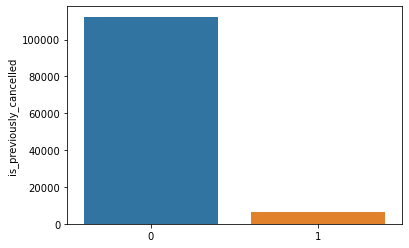

In [67]:
sns.barplot(x=pc.index, y=pc)

In [68]:
# BOOKING CHANGES

df['booking_changes'].value_counts()
# approx 94% never changed there booking
# can group this columns as never changed and changed

0     100906
1      12638
2       3789
3        925
4        375
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [69]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)

In [70]:
bc = df['is_booking_changes'].value_counts()
bc

0    100906
1     17994
Name: is_booking_changes, dtype: int64

<AxesSubplot:ylabel='is_booking_changes'>

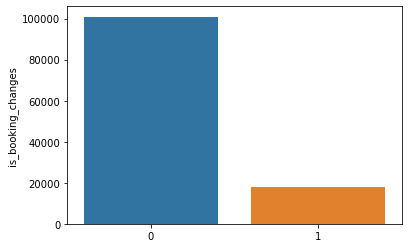

In [71]:
sns.barplot(x=bc.index, y=bc)

In [72]:
# SPECIAL REQUEST

sr = df['total_of_special_requests'].value_counts()
sr
# will booking there's no special request

0    69989
1    33124
2    12923
3     2487
4      339
5       38
Name: total_of_special_requests, dtype: int64

<AxesSubplot:ylabel='total_of_special_requests'>

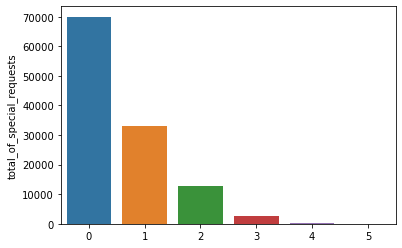

In [73]:
sns.barplot(x=sr.index, y=sr)

In [74]:
# CUSTOMER TYPE

ct = df['customer_type'].value_counts()
ct
# transient - individual booking / personal booking

Transient          89173
Transient-Party    25081
Contract            4076
Group                570
Name: customer_type, dtype: int64

<AxesSubplot:ylabel='customer_type'>

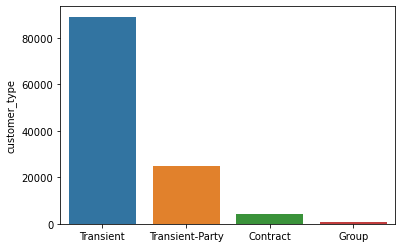

In [75]:
sns.barplot(x=ct.index, y=ct)

In [76]:
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})


### MULTIVARIANCE ANALYSIS

In [77]:
# Hotel type and cancellation
pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')
# city hotel cancellations are more than the resort type hotel cancellation
# from the data we can assume that increase in number of bookings has a chance of increase in number of cancellation(positively correlated)

is_canceled,0,1
hotel,,
City Hotel,0.582889,0.417111
Resort Hotel,0.720242,0.279758


In [78]:
# LEAD TIME AND CANCELLATION
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

# can see that longer lead time has a high chances of  cancellation 
# more than 7 months have a high chances of cancellation

is_canceled,0,1
lead_time_month,,
0,0.816458,0.183542
1,0.636390,0.363610
2,0.602519,0.397481
3,0.559197,0.440803
4,0.563817,0.436183
5,0.537400,0.462600
6,0.553784,0.446216
7,0.530570,0.469430
8,0.449606,0.550394


In [79]:
# ARRIVAL DATE YEAR AND CANCELLATION
pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize = 'index')
# we have only half yearly data in 2015 nd 2017 so can't interference properly

is_canceled,0,1
arrival_date_year,,
2015,0.629054,0.370946
2016,0.640075,0.359925
2017,0.612492,0.387508


In [80]:
# ARRIVAL MONTH DATA AND CANCELLATION

pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# JUNE, APRIL, MAY CANCELLATION IS HIGH

is_canceled,0,1
arrival_date_month,,
June,0.585065,0.414935
April,0.591489,0.408511
May,0.602937,0.397063
September,0.608293,0.391707
October,0.618927,0.381073
August,0.621969,0.378031
July,0.624960,0.375040
December,0.648781,0.351219
February,0.663630,0.336370


In [81]:
# NUMBER OF ADULTS, KIDS AND CANCELLATION

pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# morethan 4 adults is always been cancelled

is_canceled,0,1
adults,,
5,0.000000,1.000000
6,0.000000,1.000000
10,0.000000,1.000000
20,0.000000,1.000000
26,0.000000,1.000000
27,0.000000,1.000000
40,0.000000,1.000000
50,0.000000,1.000000
55,0.000000,1.000000


In [82]:
pd.crosstab(df['kids'], df['is_canceled'], normalize = 'index')
# kids do not have correlation with cancellation

is_canceled,0,1
kids,,
0,0.626791,0.373209
1,0.691444,0.308556
2,0.588485,0.411515
3,0.729730,0.270270
9,1.000000,0.000000
10,0.500000,0.500000


In [83]:
# BOOKING MEAL PACKAGE AND CANCELLATION

In [84]:

pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index')

# booking with  full board meal has likely more cancellation when compare to other meals

is_canceled,0,1
meal,,
BB,0.624939,0.375061
FB,0.401003,0.598997
HB,0.654912,0.345088
SC,0.640600,0.359400


In [85]:
# booking location and cancellation

pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')

# international cancellation is much less when compare to the portugal cancellation

is_canceled,0,1
booking_location,,
0,0.433658,0.566342
1,0.763366,0.236634


In [86]:
# MARKET SEGMENT AND CANCELLATION

pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')
# market segment through groups has high number of cancellation when compare to others
# lowest is direct/individual

is_canceled,0,1
market_segment,,
Aviation,0.780591,0.219409
Complementary,0.877384,0.122616
Corporate,0.808648,0.191352
Direct,0.845690,0.154310
Groups,0.389195,0.610805
Offline TA/TO,0.657395,0.342605
Online TA,0.632307,0.367693
Undefined,0.000000,1.000000


In [87]:
pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index')
# travel agency online and / offline has high number of cancellation

is_canceled,0,1
distribution_channel,,
Corporate,0.775998,0.224002
Direct,0.824403,0.175597
GDS,0.808290,0.191710
TA/TO,0.589497,0.410503
Undefined,0.200000,0.800000


In [88]:
# booking changes and cancellation
pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

# previously cancelled are likely to cancelled again (92 %)

is_canceled,0,1
is_previously_cancelled,,
0,0.659965,0.340035
1,0.082054,0.917946


In [89]:
# deposit type and cancellation

pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')
# non refund deposit type has high cancellation

is_canceled,0,1
deposit_type,,
No Deposit,0.715445,0.284555
Non Refund,0.006382,0.993618
Refundable,0.777778,0.222222


In [90]:
# special request and cancellation

pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')
# higher the special requests lower the cancellation (negative correlation)

is_canceled,0,1
total_of_special_requests,,
0,0.521353,0.478647
1,0.779163,0.220837
2,0.778689,0.221311
3,0.821472,0.178528
4,0.893805,0.106195
5,0.973684,0.026316


In [91]:
# parking space and cancellation

pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize='index')
# seems like who need car parking space never cancelled

is_canceled,0,1
required_car_parking_spaces,,
0,0.604301,0.395699
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
8,1.000000,0.000000


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

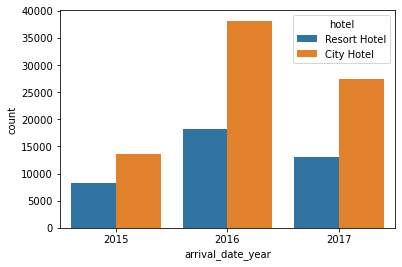

In [92]:
sns.countplot(x='arrival_date_year', hue='hotel', data=df)

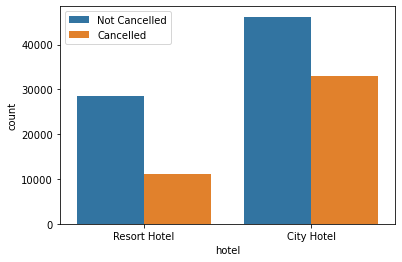

In [93]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['Not Cancelled', 'Cancelled'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


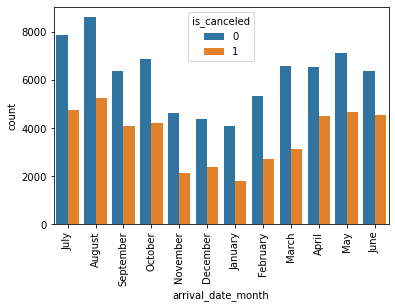

In [94]:
sns.countplot(df['arrival_date_month'], hue = df['is_canceled'])
plt.xticks(rotation = 90)

plt.show()

# as we can see from the chart below the number of cancellation generally goes up as the number of booking goes up
# however it doesn't seem number of cancellation has a linear effect towards number of booking 
# as we can see that there are certain month that has a higher percentage of confirmed booking compared to other months 

Text(0.5, 1.0, 'Daily rate by customer type')

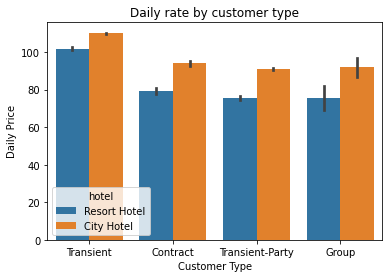

In [95]:
sns.barplot(x='customer_type', y='adr', hue='hotel', data=df)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

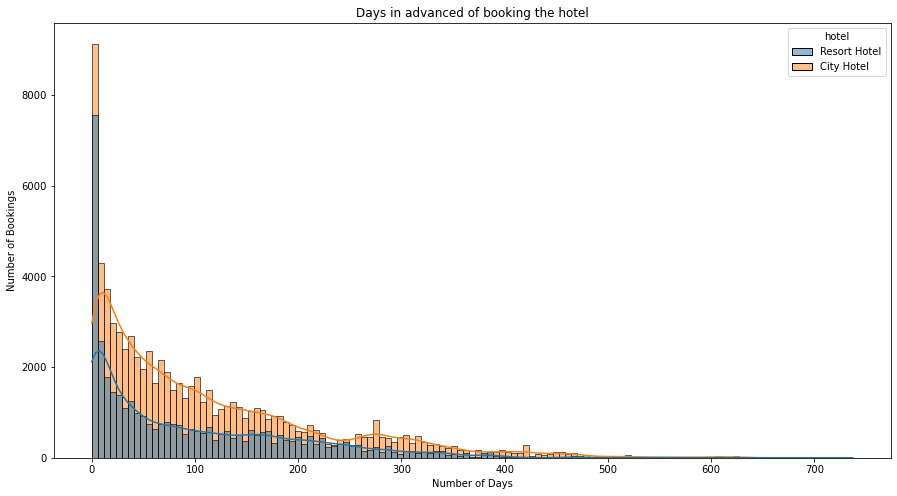

In [96]:
plt.figure(figsize=(15,8))
sns.histplot(x='lead_time', hue='hotel', data=df, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

<AxesSubplot:>

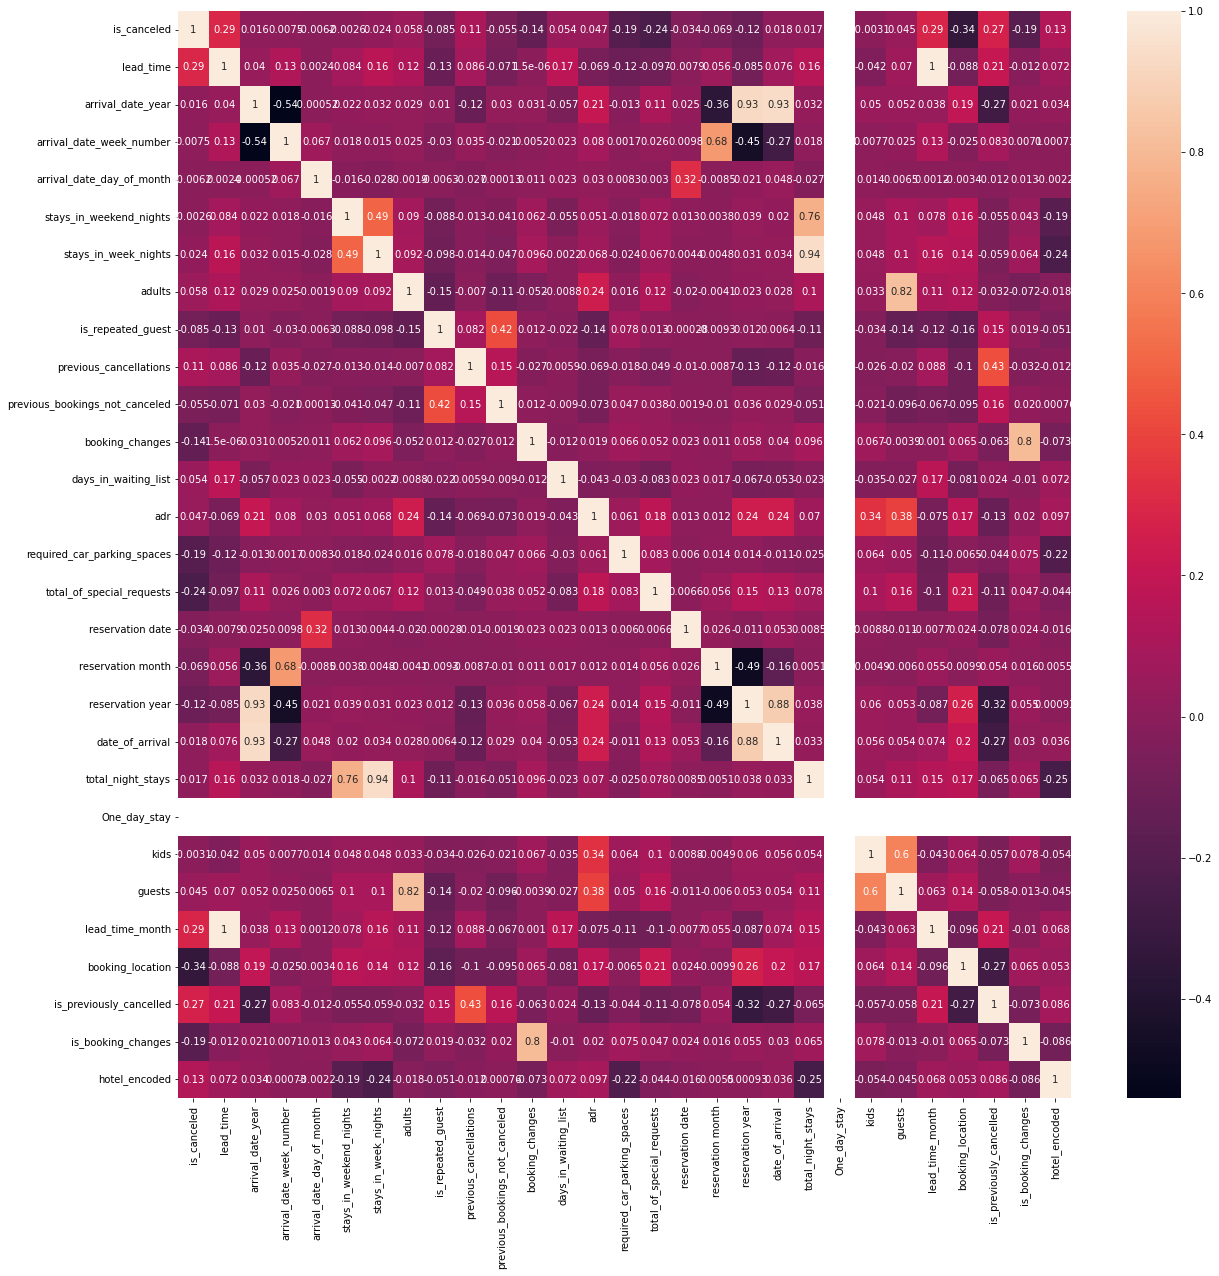

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

In [98]:
# drop the columns which we have used in feature engineering and created same meaning feature
df.drop(['hotel', 'assigned_room_type', 'reserved_room_type','booking_changes','country','reservation_status'], axis = 1, inplace = True)

In [99]:
df.drop(['arrival_date_month_number','arrival_date_day_of_month','arrival_date_year','arrival_date_month','arrival_date_week_number','reservation_status_date'], axis =1 , inplace = True)

### statistical test

We perform Shapiro test to check if the numerical features are normally distributed or not.

Hypothesis for shapiro Test

H0 : Data is normally distributed

H1 : Data is not normally distributed

In [100]:
num = df.select_dtypes(include=np.number)

In [101]:
# Shapiro-Wilk test

from scipy.stats import shapiro
for i in num.columns:
    print('Stats and p_value for',i,'is','\n',shapiro(num[i]))
    print()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Stats and p_value for is_canceled is 
 ShapiroResult(statistic=0.6126282215118408, pvalue=0.0)

Stats and p_value for lead_time is 
 ShapiroResult(statistic=0.8574172854423523, pvalue=0.0)

Stats and p_value for stays_in_weekend_nights is 
 ShapiroResult(statistic=0.7829262018203735, pvalue=0.0)

Stats and p_value for stays_in_week_nights is 
 ShapiroResult(statistic=0.8069957494735718, pvalue=0.0)

Stats and p_value for adults is 
 ShapiroResult(statistic=0.4933854937553406, pvalue=0.0)

Stats and p_value for is_repeated_guest is 
 ShapiroResult(statistic=0.1663227081298828, pvalue=0.0)

Stats and p_value for previous_cancellations is 
 ShapiroResult(statistic=0.06583613157272339, pvalue=0.0)

Stats and p_value for previous_bookings_not_canceled is 
 ShapiroResult(statistic=0.06119149923324585, pvalue=0.0)

Stats and p_value for days_in_waiting_list is 
 ShapiroResult(statistic=0.1146044135093689, pvalue=0.0)

Stats and p_value for adr is 
 ShapiroResult(statistic=0.9468602538108826, 

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Since p-value is less than 0.05 for all the independent numerical variables, we reject the null hypothesis. Hence the data is not normally distributed and we perform non parametric tests.

As the data is not Normally distributed Anova cannot be performed so a Non – Parametric test Mann Whitney U test is being performed to get the Significant variables for further model building.

### Mann Whitney U test:

In [102]:
# Hypothesis of Mann-Whitney U Test

# H0: Two samples have the same mean (insignificant) 
# H1: Two samples have different mean (significant)

In [103]:
import scipy.stats as stats

Utest_results = []
for i in num.columns:
    u_value,p_value = stats.mannwhitneyu(x=df['is_canceled'],y= num[i],alternative = 'two-sided')
    Utest_results.append([i,u_value,p_value])
    

In [104]:
columns = ['feature','Utest-statistic','p_value']
Utest_df = pd.DataFrame(Utest_results,columns = columns)
Utest_df = Utest_df.sort_values('p_value').set_index('feature')
Utest_df

,Utest-statistic,p_value
feature,,
reservation date,9.259513e+07,0.0
is_previously_cancelled,9.310405e+09,0.0
booking_location,5.513690e+09,0.0
lead_time_month,3.449453e+09,0.0
guests,5.059563e+08,0.0
kids,9.053995e+09,0.0
One_day_stay,2.625074e+09,0.0
total_night_stays,5.162852e+08,0.0
date_of_arrival,0.000000e+00,0.0


In [105]:
threshold = 0.05
signi_Utest = Utest_df[Utest_df['p_value'] < threshold]

print('Feature with significant MannwhitneyTest p-value: {}'.format(signi_Utest.shape[0]))
print('Feature with insignificant MannwhitneyTest p-value: {}'.format(Utest_df.shape[0]-signi_Utest.shape[0]))

Feature with significant MannwhitneyTest p-value: 24
Feature with insignificant MannwhitneyTest p-value: 1


From the above table we will only consider the variables having p-value less than 0.05. But it can be seen that all the variables in the given data come out to be significant variables.

### Chi Square Test:

Categorical columns – For categorical columns we perform chi-square test to check for the significance of the categorical column with respect to ‘is_canceled’ Column.

Hypothesis of Chi-square test

H0: Attributes are independent 
H1: Attributes are dependent

In [106]:
from scipy.stats import chi2,chi2_contingency
chi_sq = pd.DataFrame(columns =['Variable','p_value'])
for i in df.select_dtypes(include ='object'):
    dataset_table = pd.crosstab(df[i],df['is_canceled'])
    observed = dataset_table.values
    val2 = stats.chi2_contingency(dataset_table)
    expected = val2[3]
    chi_square = sum([(o-e)**2./e for o,e in zip(observed,expected)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    p_value = 1- chi2.cdf(x=chi_square_statistic,df=3)
    chi_sq = chi_sq.append({'Variable':i,'p_value':p_value},ignore_index=True)
chi_sq



/var/folders/t0/8n7pwsc55_99vn99b4vq69sm0000gn/T/ipykernel_4735/4148490239.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_sq = chi_sq.append({'Variable':i,'p_value':p_value},ignore_index=True)
/var/folders/t0/8n7pwsc55_99vn99b4vq69sm0000gn/T/ipykernel_4735/4148490239.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_sq = chi_sq.append({'Variable':i,'p_value':p_value},ignore_index=True)
/var/folders/t0/8n7pwsc55_99vn99b4vq69sm0000gn/T/ipykernel_4735/4148490239.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_sq = chi_sq.append({'Variable':i,'p_value':p_value},ignore_index=True)
/var/folders/t0/8n7pwsc55_99vn99b4vq69sm0000gn/T/ipykernel_4735/4148490239.py:11: FutureWarning: The frame.append method is 

,Variable,p_value
0,meal,0.0
1,market_segment,0.0
2,distribution_channel,0.0
3,deposit_type,0.0
4,agent,0.0
5,company,0.0
6,customer_type,0.0


In [107]:
cat = df.select_dtypes(include ='object')
for i in cat:
    nl = "\n"
    crosstab = pd.crosstab(cat[f"{i}"], df['is_canceled'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

is_canceled      0      1
meal                     
BB           57410  34455
FB             320    478
HB            9453   4981
SC            7561   4242 

Chi2 value= 232.42542214535501
p-value= 4.1342748979044987e-50
Degrees of freedom= 3

is_canceled         0      1
market_segment              
Aviation          185     52
Complementary     644     90
Corporate        4133    978
Direct          10528   1921
Groups           7708  12097
Offline TA/TO   15882   8277
Online TA       35664  20739
Undefined           0      2 

Chi2 value= 8395.670664457524
p-value= 0.0
Degrees of freedom= 7

is_canceled               0      1
distribution_channel              
Corporate              5037   1454
Direct                11939   2543
GDS                     156     37
TA/TO                 57611  40118
Undefined                 1      4 

Chi2 value= 3653.058249275475
p-value= 0.0
Degrees of freedom= 4

is_canceled       0      1
deposit_type              
No Deposit    74525  29641
Non 

In [108]:
threshold = 0.05
signi_chi = chi_sq[chi_sq['p_value'] < threshold]

print('Feature with significant chi_sq p-value: {}'.format(signi_chi.shape[0]))
print('Feature with insignificant chi_sq p-value: {}'.format(chi_sq.shape[0]-signi_chi.shape[0]))

Feature with significant chi_sq p-value: 7
Feature with insignificant chi_sq p-value: 0


In [109]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV,StratifiedKFold,KFold
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

### GRID SEARCH

In [110]:
cat = df.select_dtypes(include = 'object')
cat.columns

Index(['meal', 'market_segment', 'distribution_channel', 'deposit_type',
       'agent', 'company', 'customer_type'],
      dtype='object')

In [111]:
num = df.select_dtypes(include = np.number)
num.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation date', 'reservation month',
       'reservation year', 'date_of_arrival', 'total_night_stays',
       'One_day_stay', 'kids', 'guests', 'lead_time_month', 'booking_location',
       'is_previously_cancelled', 'is_booking_changes', 'hotel_encoded'],
      dtype='object')

In [112]:
cat_dummies = pd.get_dummies(cat,drop_first = True)
cat_dummies

,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,...,company_530.0,company_531.0,company_534.0,company_539.0,company_541.0,company_543.0,company_0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
119386,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
119387,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
119388,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [113]:


df1=pd.get_dummies(df, columns=['meal', 'market_segment', 'distribution_channel', 'deposit_type','agent', 'company', 'customer_type'])


In [114]:
X = df1.drop('is_canceled',axis=1)
y = df1['is_canceled']


In [115]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
X_s=ss.fit_transform(X)


In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score, recall_score, confusion_matrix,classification_report, precision_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [117]:

lr = LogisticRegression()
lr.fit(X_s, y)

y_pred_lr = lr.predict(X_s)

acc_lr = accuracy_score(y, y_pred_lr)
conf_lr = confusion_matrix(y, y_pred_lr)
clf_rep_lr = classification_report(y, y_pred_lr)

print('Accuracy Score of Logistic Regression is :', acc_lr)
print('Confusion Matrix : ',conf_lr)
print('Classification Report : ', clf_rep_lr)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of Logistic Regression is : 0.8544827586206897
Confusion Matrix :  [[69043  5701]
 [11601 32555]]
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.92      0.89     74744
           1       0.85      0.74      0.79     44156

    accuracy                           0.85    118900
   macro avg       0.85      0.83      0.84    118900
weighted avg       0.85      0.85      0.85    118900



In [118]:
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                 lg_params,
                 cv = 5,
                 scoring = 'accuracy')
lg = lg_gs.fit(X_s, y)
y_pred = lg_gs.best_estimator_.predict(X_s)

In [119]:
lg

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [3.5], 'max_iter': [300], 'penalty': ['l1']},
             scoring='accuracy')

In [120]:
print(f'Accuracy Score: {lg.score(X_s, y)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X_s, y,cv=StratifiedKFold(shuffle=True)).mean()}')
print()
print(f'Confusion Matrix: {confusion_matrix(y,y_pred)}')
print()
print(f'Classification Report: {classification_report(y,y_pred)}')


Accuracy Score: 0.854592094196804
Cross-val-score: 0.8526745164003365

Confusion Matrix: [[69045  5699]
 [11590 32566]]

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.92      0.89     74744
           1       0.85      0.74      0.79     44156

    accuracy                           0.85    118900
   macro avg       0.85      0.83      0.84    118900
weighted avg       0.85      0.85      0.85    118900



In [121]:
rf_params = {
    'n_estimators': [150],  
    'max_features': [50],
    'max_depth': [13]
}

# Perform Grid Search
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42),
                 rf_params,
                 cv = 5,
                 scoring = 'accuracy')
rf = rf_gs.fit(X_s, y)
y_pred = rf_gs.best_estimator_.predict(X_s)

In [122]:
print(f'Accuracy score: {rf.score(X_s, y)}')
print(f'Cross-val-score: {cross_val_score(rf.best_estimator_, X_s, y, cv=StratifiedKFold(shuffle=True)).mean()}')
print()
print(f'Confusion Matrix: {confusion_matrix(y,y_pred)}')
print()
print(f'Classification Report: {classification_report(y,y_pred)}')

Accuracy score: 0.8623885618166527
Cross-val-score: 0.8576787216148025

Confusion Matrix: [[73205  1539]
 [14823 29333]]

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.98      0.90     74744
           1       0.95      0.66      0.78     44156

    accuracy                           0.86    118900
   macro avg       0.89      0.82      0.84    118900
weighted avg       0.88      0.86      0.86    118900



In [123]:
dt_params = {
    'max_depth':[None],
    'max_features' : [0.7],
    'min_samples_split': [25], 
    'min_samples_leaf': [1]
}

# Perform Grid Search
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 dt_params,
                 cv = 5,
                 scoring = 'accuracy')
dt = dt_gs.fit(X_s, y)
y_pred = dt_gs.best_estimator_.predict(X_s)

In [124]:
print(f' Accuracy score: {dt.score(X_s, y)}')
print(f'Cross-val-score: {cross_val_score(dt.best_estimator_, X_s, y, cv=StratifiedKFold(shuffle=True)).mean()}')
print()
print(f'Confusion Matrix: {confusion_matrix(y,y_pred)}')
print()
print(f'Classification Report: {classification_report(y,y_pred)}')

 Accuracy score: 0.9643145500420521
Cross-val-score: 0.9328595458368376

Confusion Matrix: [[73394  1350]
 [ 2893 41263]]

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.98      0.97     74744
           1       0.97      0.93      0.95     44156

    accuracy                           0.96    118900
   macro avg       0.97      0.96      0.96    118900
weighted avg       0.96      0.96      0.96    118900



In [125]:
knn = KNeighborsClassifier(n_neighbors = 3)
kn_ = knn.fit(X_s,y)
cv_scores = cross_val_score(knn, X_s, y, cv=5)

In [126]:
print(f' Accuracy score: {kn_.score(X_s, y)}')
print(f'cv_scores mean: {cv_scores.mean()}')


 Accuracy score: 0.9376787216148024
cv_scores mean: 0.5862825904121111


In [127]:
from xgboost import XGBClassifier

In [128]:
xgbc = XGBClassifier()

In [129]:
xg = xgbc.fit(X_s, y)
kfold = KFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(xgbc, X_s, y, cv=kfold,scoring ='accuracy' )

In [130]:
print(f'Accuracy score: {xg.score(X_s, y)}')
print(f'Cross-val-score: {cv_scores.mean()}')


Accuracy score: 0.9787888982338099
Cross-val-score: 0.9736248948696383


In [131]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
xg_gs = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

xg_gs.fit(X_s, y)
y_pred = xg_gs.best_estimator_.predict(X_s)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
print(f'Accuracy score: {grid_result.score(X_s, y)}')
print(f'Cross-val-score: {
cross_val_score(grid_result.best_estimator_, X_s, y, cv=StratifiedKFold(shuffle=True)).mean()}')
print()
print(f'Confusion Matrix: {confusion_matrix(y,y_pred)}')
print()
print(f'Classification Report: {classification_report(y,y_pred)}')

In [ ]:
predictive_model_scores = pd.DataFrame(data=[('Logistic Regression_hp',0.8545, 0.8530),\
                                             ('Random Forest_hp',0.8623, 0.8593),\
                                             ('Decision Tree_hp',0.9643, 0.9287),\
                                             ('KNN_gs',0.9378, 0.5368),\
                                             ('XGBC_gs',0.9787, 0.9736)],\
                                       columns=['model', 'accuracy_score', 'Cross_val_score'])
predictive_model_scores


In [ ]:
TP = 14000
# True Negatives:
TN = 24000
# False Posititives: 
FP = 260
# False Negatives: 
FN = 660
total = 24000+14000+260+660

print(f'Correctly classified: {np.round((TP+TN)/total*100)}%')
print(f'Canceled bookings correctly classified: {np.round(TP/(TP+FN)*100)}%')
print(f'Not canceled bookings correctly classified: {np.round(TN/(TN+FP)*100)}%')
print(f'Bookings predicted canceled that are actually canceled: {np.round(TP/(TP+FP)*100)}%')
print(f'Bookings predicted not canceled that are actually not canceled: {np.round(TN/(TN+FN)*100)}%')

In [ ]:
predictions = xg_gs.predict(X_s)
 
cm = confusion_matrix(y, predictions)
  
cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,4))
    
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20)
plt.xlabel('Predicted Class')
plt.ylabel('True Class');

In [1]:
# True positive
TP = 14060
# True Negatives:
TN = 23882
# False Posititives: 
FP = 200
# False Negatives: 
FN = 444
total = 23882+14060+200+444
import numpy as np
print(f'Correctly classified: {np.round((TP+TN)/total*100)}%')
print(f'Canceled bookings correctly classified: {np.round(TP/(TP+FN)*100)}%')
print(f'Not canceled bookings correctly classified: {np.round(TN/(TN+FP)*100)}%')
print(f'Bookings predicted canceled that are actually canceled: {np.round(TP/(TP+FP)*100)}%')
print(f'Bookings predicted not canceled that are actually not canceled: {np.round(TN/(TN+FN)*100)}%')

Correctly classified: 98.0%
Canceled bookings correctly classified: 97.0%
Not canceled bookings correctly classified: 99.0%
Bookings predicted canceled that are actually canceled: 99.0%
Bookings predicted not canceled that are actually not canceled: 98.0%
